<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#### Load the first dataset and check the first two observations

In [70]:
wine=pd.read_csv("whitewine.csv",sep=';')
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6


In [3]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

skewness of Volatile Acidity is: 1.5769795029952025


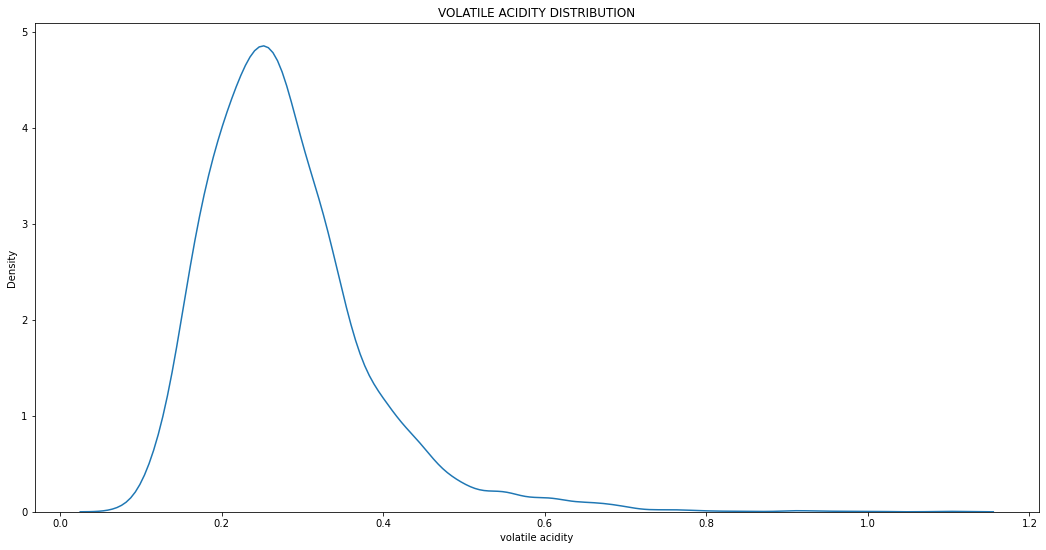

In [4]:
print("skewness of Volatile Acidity is:",wine['volatile acidity'].skew())
plt.figure(figsize=(18,9))
sns.kdeplot(wine['volatile acidity'])
plt.title("VOLATILE ACIDITY DISTRIBUTION")
plt.show()

#needs a transformation as the variable is very skewed towards the right

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

skewness of Residual Sugar is: 1.0770937564240868


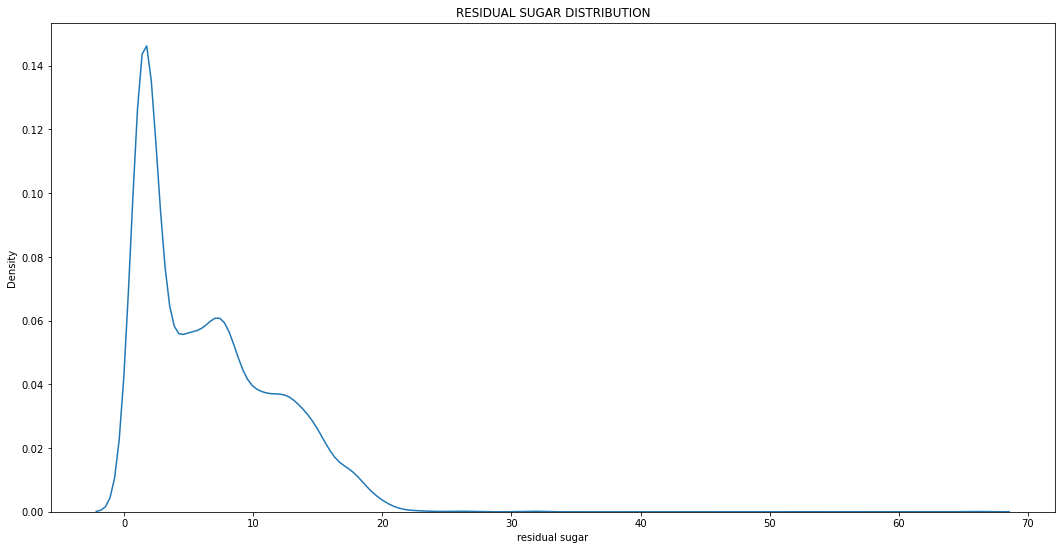

In [5]:
print("skewness of Residual Sugar is:",wine['residual sugar'].skew())
plt.figure(figsize=(18,9))
sns.kdeplot(wine['residual sugar'])
plt.title("RESIDUAL SUGAR DISTRIBUTION")
plt.show()

In [6]:
#since it is very right skewed we can use the log transformation

In [7]:
wine['sugar_root']=np.log(wine['residual sugar'])

skewness of transformed sugar is: -0.1611568975182972


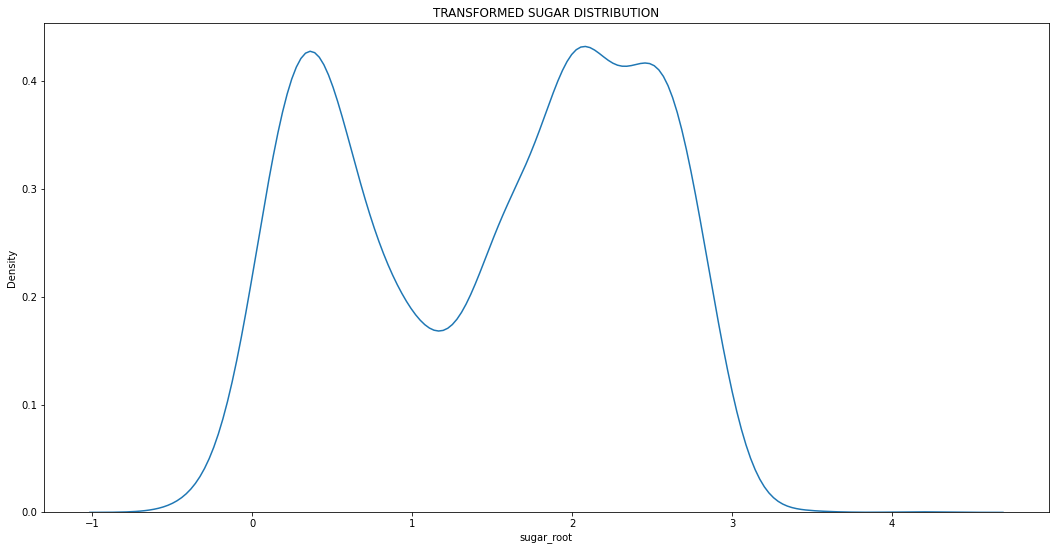

In [8]:
print("skewness of transformed sugar is:",wine['sugar_root'].skew())
plt.figure(figsize=(18,9))
sns.kdeplot(wine['sugar_root'])
plt.title("TRANSFORMED SUGAR DISTRIBUTION")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
wine.var()

fixed acidity             0.712114
volatile acidity          0.010160
citric acid               0.014646
residual sugar           25.725770
chlorides                 0.000477
free sulfur dioxide     289.242720
total sulfur dioxide   1806.085491
density                   0.000009
pH                        0.022801
sulphates                 0.013025
alcohol                   1.514427
quality                   0.784356
sugar_root                0.849615
dtype: float64

In [10]:
X=wine.drop(['quality','sugar_root'],axis=1)
X=sm.add_constant(X)
y=wine['quality']
model0=sm.OLS(y,X).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:22:58   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

skewness of alcohol is: 0.4873419932161276


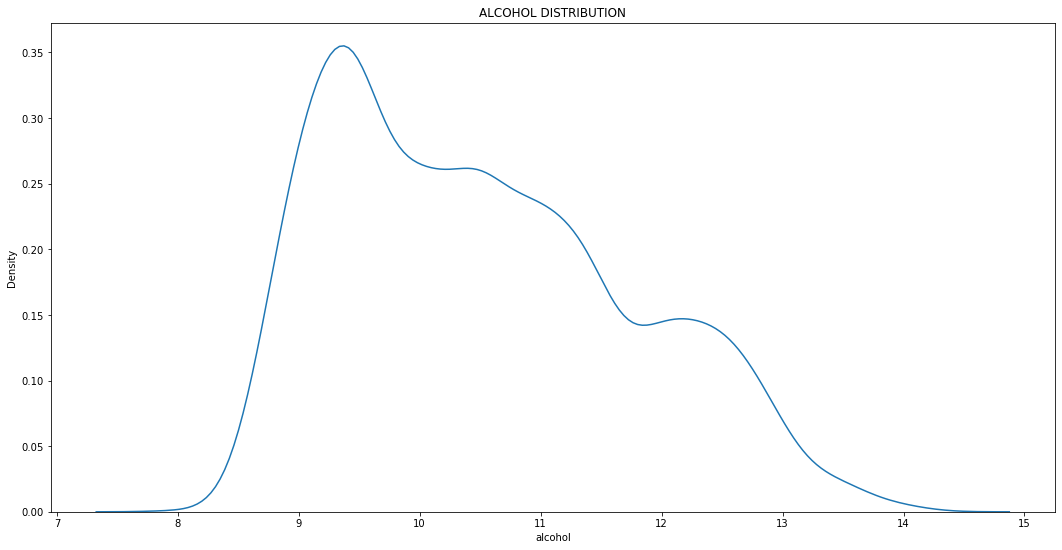

In [11]:
print("skewness of alcohol is:",wine['alcohol'].skew())
plt.figure(figsize=(18,9))
sns.kdeplot(wine['alcohol'])
plt.title("ALCOHOL DISTRIBUTION")
plt.show()

In [12]:
#slightly right skewed we can use 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
X=wine.drop(['quality','sugar_root'],axis=1)
X=sm.add_constant(X)
y=wine['quality']
model0=sm.OLS(y,X).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:22:58   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

In [14]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [15]:
wine['scaled_pH']=SS.fit_transform(wine[['pH']])

In [16]:
X=wine.drop(['quality','sugar_root','pH'],axis=1)
X=sm.add_constant(X)
y=wine['quality']
model0=sm.OLS(y,X).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:22:59   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811 

In [17]:
#we can see no changes in both models.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif=pd.DataFrame()
X=wine.drop(['quality','sugar_root','scaled_pH'],axis=1)
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
print(vif)
#drop the density column

                features         VIF
0          fixed acidity   92.861483
1       volatile acidity    9.730569
2            citric acid   10.007114
3         residual sugar    3.830272
4              chlorides    6.497448
5    free sulfur dioxide    9.261556
6   total sulfur dioxide   24.980802
7                density 1056.497431
8                     pH  609.861725
9              sulphates   20.527123
10               alcohol  118.707368


In [20]:
vif=pd.DataFrame()
X1=wine.drop(['quality','sugar_root','scaled_pH','density'],axis=1)
vif['features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values,i)for i in range(X1.shape[1])]
print(vif)

               features        VIF
0         fixed acidity  58.337764
1      volatile acidity   9.683289
2           citric acid  10.002239
3        residual sugar   3.429412
4             chlorides   6.093775
5   free sulfur dioxide   9.210046
6  total sulfur dioxide  24.980442
7                    pH 160.145168
8             sulphates  20.526697
9               alcohol 103.478234


In [21]:
vif=pd.DataFrame()
X2=wine.drop(['quality','sugar_root','scaled_pH','density','pH'],axis=1)
vif['features']=X2.columns
vif['VIF']=[variance_inflation_factor(X2.values,i)for i in range(X2.shape[1])]
print(vif)

               features       VIF
0         fixed acidity 54.541049
1      volatile acidity  9.683068
2           citric acid  9.959726
3        residual sugar  3.367263
4             chlorides  5.680984
5   free sulfur dioxide  9.208379
6  total sulfur dioxide 23.263297
7             sulphates 18.965802
8               alcohol 45.630540


In [22]:
vif=pd.DataFrame()
X3=wine.drop(['quality','sugar_root','scaled_pH','density','pH','fixed acidity'],axis=1)
vif['features']=X3.columns
vif['VIF']=[variance_inflation_factor(X3.values,i)for i in range(X3.shape[1])]
print(vif)

               features       VIF
0      volatile acidity  9.678151
1           citric acid  9.002814
2        residual sugar  3.240373
3             chlorides  5.526225
4   free sulfur dioxide  9.027919
5  total sulfur dioxide 21.661213
6             sulphates 18.777964
7               alcohol 25.796804


In [23]:
vif=pd.DataFrame()
X4=wine.drop(['quality','sugar_root','scaled_pH','density','pH','fixed acidity','total sulfur dioxide'],axis=1)
vif['features']=X4.columns
vif['VIF']=[variance_inflation_factor(X4.values,i)for i in range(X4.shape[1])]
print(vif)

              features       VIF
0     volatile acidity  9.079616
1          citric acid  8.846688
2       residual sugar  3.003763
3            chlorides  5.361558
4  free sulfur dioxide  5.806088
5            sulphates 17.571828
6              alcohol 25.784880


In [24]:
vif=pd.DataFrame()
X5=wine.drop(['quality','sugar_root','scaled_pH','density','pH','fixed acidity','total sulfur dioxide','alcohol'],axis=1)
vif['features']=X5.columns
vif['VIF']=[variance_inflation_factor(X5.values,i)for i in range(X5.shape[1])]
print(vif)

              features       VIF
0     volatile acidity  6.746062
1          citric acid  7.625044
2       residual sugar  2.898728
3            chlorides  5.359688
4  free sulfur dioxide  5.638688
5            sulphates 11.714178


In [25]:
vif=pd.DataFrame()
X6=wine.drop(['quality','sugar_root','scaled_pH','density','pH','fixed acidity','total sulfur dioxide','alcohol','sulphates'],axis=1)
vif['features']=X6.columns
vif['VIF']=[variance_inflation_factor(X6.values,i)for i in range(X6.shape[1])]
print(vif)

              features      VIF
0     volatile acidity 5.346423
1          citric acid 6.150995
2       residual sugar 2.896183
3            chlorides 5.194186
4  free sulfur dioxide 5.157428


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
X=wine.drop(['quality','sugar_root','scaled_pH'],axis=1)
X=sm.add_constant(X)
y=wine['quality']
model0=sm.OLS(y,X).fit()
print(model0.summary())
#We need to do Jarque-Bera test to verify the normality of residuals
#The Prob(JB) is les than the l.o.s. thus we can say the assumption is violated

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:23:01   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
X=wine.drop(['quality','sugar_root','scaled_pH'],axis=1)
X=sm.add_constant(X)
y=wine['quality']
model0=sm.OLS(y,X).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:23:01   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

In [28]:
wine['scaled_citric_acid']=SS.fit_transform(wine[['citric acid']])

In [29]:
X=wine.drop(['quality','sugar_root','scaled_pH','citric acid'],axis=1)
X=sm.add_constant(X)
y=wine['quality']
model1=sm.OLS(y,X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:23:01   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.2002 

In [30]:
#i see no changes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:23:01   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

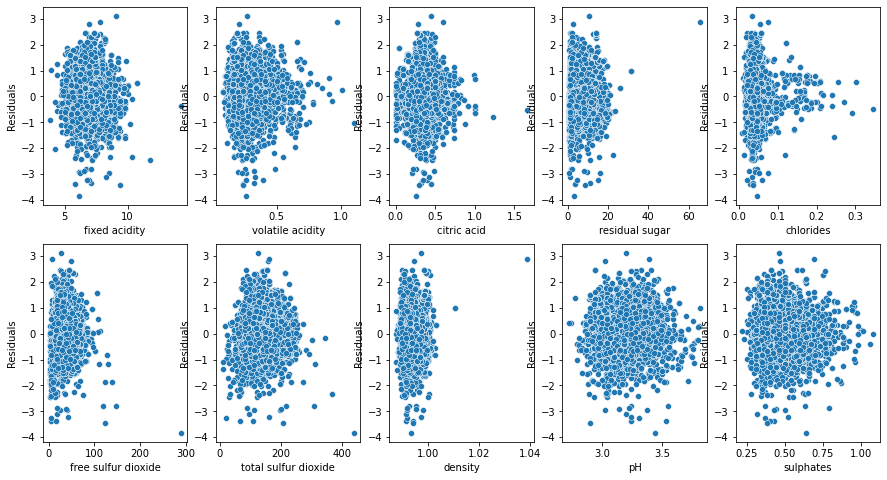

In [31]:
X=wine.drop(['quality','sugar_root','scaled_pH','scaled_citric_acid'],axis=1)
X=sm.add_constant(X)
y=wine['quality']
model2=sm.OLS(y,X).fit()
print(model2.summary())

residuals = model2.resid

# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 5, figsize=(15,8))
# use for loop to create scatter plot for residuals and each independent variable (do not cosider the intercept)
# 'ax' assigns axes object to draw the plot onto
# set_ylabel() is used to set label to y axis
for variable, subplot in zip(X.columns[1:], ax.flatten()):
    z = sns.scatterplot(X[variable], residuals , ax=subplot)
    z.set_ylabel("Residuals", fontsize = 10)

In [32]:
#since the points are at random and do not display any certain pattern we can say they are linear with wine quality

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
lr=LinearRegression()
fs=sfs(lr,k_features=5,forward=True,scoring='r2',verbose=2)
X=wine.drop(['quality'],axis=1)
y=wine['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
model1=fs.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2021-08-05 12:23:04] Features: 1/5 -- score: 0.18565846860352717[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2021-08-05 12:23:04] Features: 2/5 -- score: 0.23629929361188456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2021-08-05 12:23:04] Features: 3/5 -- score: 0.2583305552189094[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [35]:
model1.k_feature_names_

('fixed acidity', 'volatile acidity', 'sulphates', 'alcohol', 'sugar_root')

In [36]:
model1.k_score_

0.2685242748182352

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
be=sfs(lr,k_features=5,forward=False,scoring='r2',verbose=2)
model2=be.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished

[2021-08-05 12:23:05] Features: 13/5 -- score: 0.2716450721293267[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2021-08-05 12:23:06] Features: 12/5 -- score: 0.2724841931045639[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2021-08-05 12:23:06] Features: 11/5 -- score: 0.2729302135625951[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [38]:
model2.k_feature_names_

('volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol')

In [39]:
model2.k_score_

0.2667934266541939

In [40]:
#almost same with the model obtained from q10

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
fs1=sfs(lr,k_features=(2,6),forward=True,scoring='r2',verbose=2)
model3=fs1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished

[2021-08-05 12:23:08] Features: 1/6 -- score: 0.18565846860352717[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2021-08-05 12:23:08] Features: 2/6 -- score: 0.23629929361188456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2021-08-05 12:23:08] Features: 3/6 -- score: 0.2583305552189094[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [42]:
model3.k_feature_names_

('fixed acidity',
 'volatile acidity',
 'free sulfur dioxide',
 'sulphates',
 'alcohol',
 'sugar_root')

In [43]:
model3.k_score_

0.2699197596586568

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
fs2=sfs(lr,k_features='best',forward=True,scoring='r2',verbose=2)
model4=fs2.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2021-08-05 12:23:09] Features: 1/14 -- score: 0.18565846860352717[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2021-08-05 12:23:09] Features: 2/14 -- score: 0.23629929361188456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2021-08-05 12:23:09] Features: 3/14 -- score: 0.2583305552189094[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [45]:
model4.k_feature_names_

('fixed acidity',
 'volatile acidity',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'sulphates',
 'alcohol',
 'sugar_root')

In [46]:
model4.k_score_

0.27037013240742425

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
be1=sfs(lr,k_features='best',forward=False,scoring='r2',verbose=2)
model5=be1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished

[2021-08-05 12:23:11] Features: 13/1 -- score: 0.2716450721293267[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2021-08-05 12:23:12] Features: 12/1 -- score: 0.2724841931045639[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2021-08-05 12:23:12] Features: 11/1 -- score: 0.2729302135625951[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [48]:
model5.k_feature_names_

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [49]:
model5.k_score_

0.2739751646460153

In [50]:
#almost same

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
rfe1=RFE(lr,n_features_to_select=5)
model6=rfe1.fit(X_train,y_train)

In [52]:
feat_index=pd.DataFrame(model6.ranking_,index=X_train.columns,columns=['rank'])
feat_index

,rank
fixed acidity,5
volatile acidity,1
citric acid,9
residual sugar,4
chlorides,2
free sulfur dioxide,8
total sulfur dioxide,10
density,1
pH,6
sulphates,1


In [53]:
feat_index[feat_index['rank']==1].index.to_list()

['volatile acidity', 'density', 'sulphates', 'alcohol', 'sugar_root']

In [54]:
X1=X_train[feat_index[feat_index['rank']==1].index.to_list()]
model7=lr.fit(X1,y_train)
model7.score(X1,y_train)

0.2712898665074829

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
lr=LinearRegression()
fs=sfs(lr,k_features=5,forward=True,scoring='r2',verbose=2)
X=wine.drop(['quality'],axis=1)
y=wine['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
model1=fs.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2021-08-05 12:23:14] Features: 1/5 -- score: 0.18565846860352717[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2021-08-05 12:23:15] Features: 2/5 -- score: 0.23629929361188456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2021-08-05 12:23:15] Features: 3/5 -- score: 0.2583305552189094[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [56]:
X=wine[list(model1.k_feature_names_)]
y=wine['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [57]:
lrmodel=lr.fit(X_train,y_train)
train_predict=lrmodel.predict(X_train)
test_predict=lrmodel.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,train_predict))
test_rmse=np.sqrt(mean_squared_error(y_test,test_predict))

In [58]:
train_rmse,test_rmse #underfit

(0.7576335763800829, 0.7538151523395094)

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
New_pH=[]
for i in range(0, wine.pH.shape[0]):
    if wine.pH.iloc[i]==7:
        New_pH.append('N')
    elif wine.pH.iloc[i]>7:
        New_pH.append('B')
    elif wine.pH.iloc[i]<7:
        New_pH.append('A')
wine['New_pH']= New_pH
wine.New_pH.value_counts() #only one type and

A    4898
Name: New_pH, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
x=wine.drop('quality',axis=1)
y=wine['quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
lr=LinearRegression()
x_train.shape

(3918, 11)

In [72]:
scores = cross_val_score(estimator = LinearRegression(), 
                         X = x_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'r2')

In [73]:
scores.mean()

0.27192978235421544

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')
scores.mean()

0.2685242748182351

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [76]:
loocv_rmse = []

loocv = LeaveOneOut()
for train_index, test_index in loocv.split(X_train):
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    linreg = LinearRegression()
    linreg.fit(X_train_l, y_train_l)
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    rmse = np.sqrt(mse)
    loocv_rmse.append(rmse)

In [77]:
np.array(loocv_rmse).mean()

0.5923926723461611